In [1]:

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

In [2]:
'''datasetlink: https://www.kaggle.com/datasets/rizwan123456789/potato-disease-leaf-datasetpld'''

'datasetlink: https://www.kaggle.com/datasets/rizwan123456789/potato-disease-leaf-datasetpld'

In [5]:
import zipfile
import os

# Path to your zip file (adjust this if needed)
zip_path = "C:/Users/Adesh Punde/Downloads/potato-disease-leaf-datasetpld.zip"  # e.g., "PLD_3_Classes_256.zip"
extract_path = "unzipped_dataset"

# Check if the file exists
if os.path.exists(zip_path):
    try:
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_path)
        print(f"✅ Extracted to: {extract_path}")
        
        # Optional: list extracted files
        for root, dirs, files in os.walk(extract_path):
            for name in files:
                print("📄", os.path.join(root, name))
    except zipfile.BadZipFile:
        print("❌ Error: Not a valid ZIP file.")
else:
    print("❌ ZIP file not found.")


✅ Extracted to: unzipped_dataset
📄 unzipped_dataset\PLD_3_Classes_256\Testing\Early_Blight\Early_Blight_1.jpg
📄 unzipped_dataset\PLD_3_Classes_256\Testing\Early_Blight\Early_Blight_10.jpg
📄 unzipped_dataset\PLD_3_Classes_256\Testing\Early_Blight\Early_Blight_100.jpg
📄 unzipped_dataset\PLD_3_Classes_256\Testing\Early_Blight\Early_Blight_101.jpg
📄 unzipped_dataset\PLD_3_Classes_256\Testing\Early_Blight\Early_Blight_102.jpg
📄 unzipped_dataset\PLD_3_Classes_256\Testing\Early_Blight\Early_Blight_103.jpg
📄 unzipped_dataset\PLD_3_Classes_256\Testing\Early_Blight\Early_Blight_104.jpg
📄 unzipped_dataset\PLD_3_Classes_256\Testing\Early_Blight\Early_Blight_105.jpg
📄 unzipped_dataset\PLD_3_Classes_256\Testing\Early_Blight\Early_Blight_106.jpg
📄 unzipped_dataset\PLD_3_Classes_256\Testing\Early_Blight\Early_Blight_107.jpg
📄 unzipped_dataset\PLD_3_Classes_256\Testing\Early_Blight\Early_Blight_108.jpg
📄 unzipped_dataset\PLD_3_Classes_256\Testing\Early_Blight\Early_Blight_109.jpg
📄 unzipped_dataset\PLD

In [7]:
IMAGE_SIZE = 256
BATCH_SIZE = 32

base_dir = "unzipped_dataset/PLD_3_Classes_256"

training_dataset = tf.keras.preprocessing.image_dataset_from_directory(
   os.path.join(base_dir, 'Training'),
   shuffle=True,
   image_size=(IMAGE_SIZE, IMAGE_SIZE),
   batch_size=BATCH_SIZE
)

testing_dataset = tf.keras.preprocessing.image_dataset_from_directory(
   os.path.join(base_dir, 'Testing'),
   shuffle=True,
   image_size=(IMAGE_SIZE, IMAGE_SIZE),
   batch_size=BATCH_SIZE
)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
   os.path.join(base_dir, 'Validation'),
   shuffle=True,
   image_size=(IMAGE_SIZE, IMAGE_SIZE),
   batch_size=BATCH_SIZE
)


Found 3251 files belonging to 3 classes.
Found 405 files belonging to 3 classes.
Found 416 files belonging to 3 classes.


In [8]:
class_names = training_dataset.class_names
class_names

['Early_Blight', 'Healthy', 'Late_Blight']

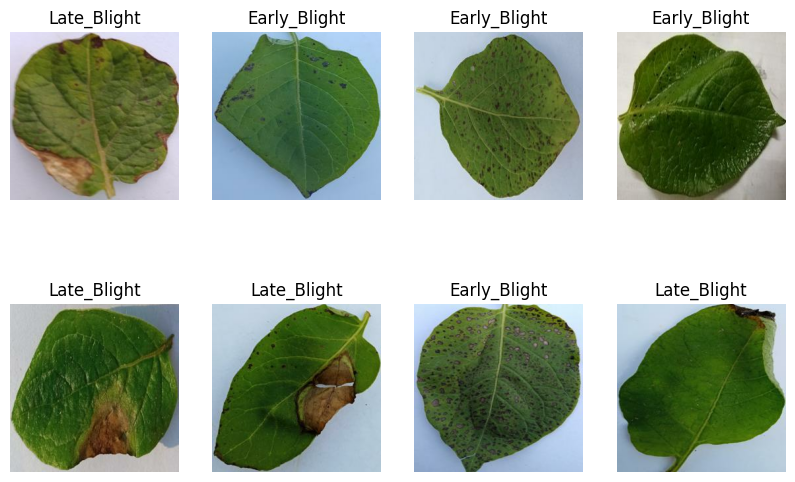

In [9]:
len(training_dataset)
plt.figure(figsize=(10,10))
for image_batch,label_batch in training_dataset.take(1):
    for i in range(0,8):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint32"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [10]:
train_data = training_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
valid_data = validation_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data = testing_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [11]:
import tensorflow as tf
from tensorflow.keras import layers

resize_scale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0 / 255)
])


In [12]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [13]:
input_shape = (32, IMAGE_SIZE, IMAGE_SIZE, 3)

model = tf.keras.Sequential([
    resize_scale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(len(class_names),activation='softmax'),
])
model.build(input_shape=input_shape)

C:\Users\Adesh Punde\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.fit(
    training_dataset,
    epochs=5, 
    batch_size=32,
    verbose=1,
    validation_data=validation_dataset
)
model.evaluate(test_data)

Epoch 1/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 73s 700ms/step - accuracy: 0.4190 - loss: 1.0520 - val_accuracy: 0.6250 - val_loss: 0.8897
Epoch 2/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 68s 670ms/step - accuracy: 0.5529 - loss: 0.9443 - val_accuracy: 0.7332 - val_loss: 0.7174
Epoch 3/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 72s 704ms/step - accuracy: 0.7236 - loss: 0.6795 - val_accuracy: 0.7740 - val_loss: 0.5501
Epoch 4/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 68s 662ms/step - accuracy: 0.8121 - loss: 0.4896 - val_accuracy: 0.7812 - val_loss: 0.5473
Epoch 5/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 66s 648ms/step - accuracy: 0.8645 - loss: 0.3645 - val_accuracy: 0.9062 - val_loss: 0.2690
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step - accuracy: 0.9047 - loss: 0.2514


[0.2905007004737854, 0.8888888955116272]

In [16]:
test_loss, test_accuracy = model.evaluate(test_data)
print(f'Test accuracy: {test_accuracy}')

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - accuracy: 0.9136 - loss: 0.2476
Test accuracy: 0.8888888955116272


In [17]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image


In [18]:
# Load the image
img_path = 'PLD_3_Classes_256/Testing/Healthy/Healthy_101.jpg'
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))

# Convert image to array
img_array = tf.keras.preprocessing.image.img_to_array(img)

# Normalize and expand dimensions
img_array = img_array / 255.0
img_array = tf.expand_dims(img_array, 0)  # Convert to shape (1, 256, 256, 3)


FileNotFoundError: [Errno 2] No such file or directory: 'PLD_3_Classes_256/Testing/Healthy/Healthy_101.jpg'

In [54]:
predictions = model.predict(img_array)
predicted_class = class_names[np.argmax(predictions)]
confidence = np.max(predictions)


1/1 [==============================] - 0s 94ms/step


In [55]:
print(f"Predicted class: {predicted_class} (Confidence: {confidence:.2f})")


Predicted class: Healthy (Confidence: 0.97)


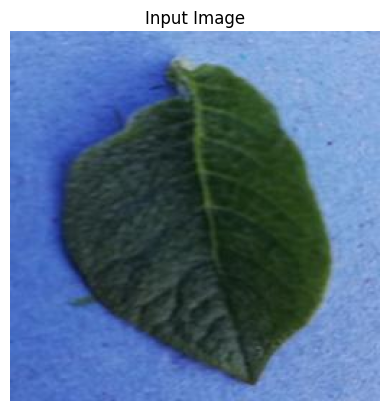

1/1 [==============================] - 0s 32ms/step
Predicted class: Healthy (Confidence: 0.97)


In [56]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load and preprocess the image
img_path = 'PLD_3_Classes_256/Testing/Healthy/Healthy_101.jpg'  # Replace with actual path
img = image.load_img(img_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))

# Show the image (optional)
plt.imshow(img)
plt.axis("off")
plt.title("Input Image")
plt.show()

# Convert to array and preprocess
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # Normalize to [0, 1]
img_array = np.expand_dims(img_array, axis=0)  # Shape becomes (1, 256, 256, 3)

# Make prediction
predictions = model.predict(img_array)
predicted_class = class_names[np.argmax(predictions)]
confidence = np.max(predictions)

# Print the result
print(f"Predicted class: {predicted_class} (Confidence: {confidence:.2f})")
